In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`

gdp_df = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data\gdp_percapita.csv')


In [137]:
gdp_df.shape

(7662, 3)

In [138]:
gdp_df.tail()

,Country or Area,Year,Value
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843
7661,Zimbabwe,1990,2704.757299


In [139]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [140]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB



gdp_df.tail()

In [ ]:
# Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
# gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

gdp_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}, inplace=True)

gdp_df.head(10)

In [157]:
# 7. How many countries have data for all years?
gdp_df['Year'].nunique()

33

In [154]:
# 7b Which countries are missing many years of data?
unique_years = pd.DataFrame(gdp_df.groupby(['Country'])['Year'].count())
print(unique_years)
# unique_years.reset_index(inplace=True)
# print(unique_years[unique_years['Years']==33])
# print(unique_years[unique_years['Years']!=33])

                             Year
Country                          
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
...                           ...
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33

[242 rows x 1 columns]


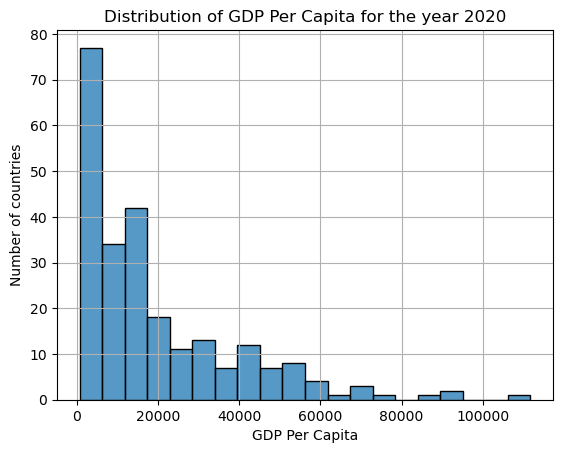

In [155]:
# Create a histogram
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.histplot(gdp_df_filtered['GDP_Per_Capita'], bins=20)
plt.title('Distribution of GDP Per Capita for the year 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of countries')
plt.grid(True)
plt.show()

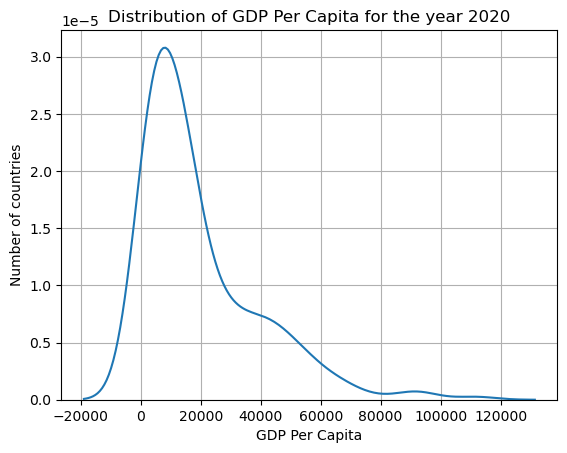

In [156]:
# density plot
sns.kdeplot(gdp_df_filtered['GDP_Per_Capita'])
plt.title('Distribution of GDP Per Capita for the year 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of countries')
plt.grid(True)
plt.show()


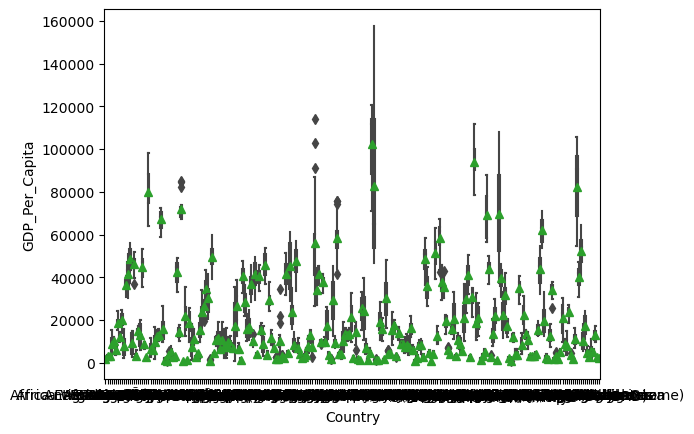

In [170]:
#boxplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.boxplot(
    x = "Country",
    y = "GDP_Per_Capita",
    showmeans=True,
    data=gdp_df
)

plt.show()



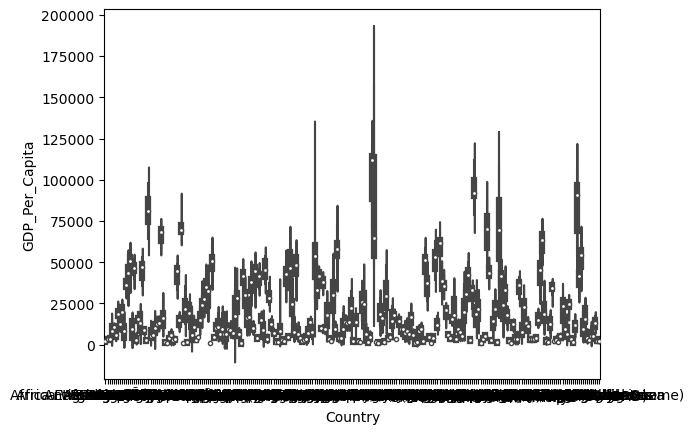

In [175]:
# violinplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(
    x = "Country",
    y = "GDP_Per_Capita",
    showmeans=True,
    data=gdp_df
)

plt.show()

In [184]:
# 9 What was the median GDP per capita value in 2020
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
GDP_Per_Capita = gdp_df_filtered['GDP_Per_Capita']
median_gdp_per_capita = np.median(GDP_Per_Capita)
print('median_gdp_per_capita')

median_gdp_per_capita


In [ ]:
# compare GDP per capita values for the years 1990, 2000, 2010 and 2020

